# Thesis EDA

Last updated: 02/23/2023

### Contents

0. [Restate research question and hypothesis](#bullet0)
1. [Import modules and data](#bullet1)

What's been done so far:
Data joined between sales data and PLUTO data.
Data types cleared up.

2. [EDA and preprocessing](#bullet2)

Visualize univariate dist. (sale price, sale price over time)
Visualize bivariate dist. (sale price x some of the more important predictors based on the lit, colored by time)

Run KMeans to visualize clusters.

Run Lasso to get feature importance.

(Would I ever want to split into 2 datasets along intrinsic and extrinsic factors and run PCA on each and then compare?)

3. [Predicting sale price with nonspatial models](#bullet3)

Models determined by what K+B did.
And Lasso for my own Qs. 

Run Decision Tree and Lasso so I can do a side by side comparison of feature importance changes.


4. [Predicting sale price with spatial models](#bullet4)

Add spatial features.

5. Predicting probability of sale with nonspatial models
6. Predicting probability of sale with spatial models
7. Compare model performance


<a class="anchor" id="bullet1"></a>

#### Research Question and Hypothesis <a class="anchor" id="bullet0"></a>

Research Question: 
How do buyer preferences change?
In hedonic price model, how does relative weight of intrinsic and extrinsic factors change?

Hypothesis: 
Value extrinsic more and extrinsic less after Covid-19.
Re-conception of the idea of neighborhood.

#### Import modules and data. <a class="anchor" id="bullet1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/new.csv", index_col=0, low_memory=False)

In [3]:
dtypes = pd.DataFrame(df.dtypes).sort_values(0)
dtypes.value_counts()

float64    73
object     38
int64       4
dtype: int64

In [4]:
list(df.columns)

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'RESIDENTIAL\nUNITS',
 'COMMERCIAL\nUNITS',
 'TOTAL \nUNITS',
 'LAND \nSQUARE FEET',
 'GROSS \nSQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS\nAT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE',
 'saleprice',
 'saledate',
 'borough',
 'block',
 'lot',
 'cd',
 'bct2020',
 'bctcb2020',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healthcenterdistrict',
 'healtharea',
 'sanitboro',
 'sanitdistrict',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strg

In [14]:
#problematic data
missing = pd.DataFrame(df.isna().sum()).rename(columns={0: 'missing_count'})
zeros = pd.DataFrame((df == 0).astype(int).sum(axis=0)).rename(columns={0: 'zero_count'})
problems = pd.concat((missing, zeros), axis=1)
problems['missing_pct'] = problems.missing_count / len(df) * 100
problems['zero_pct'] = problems.zero_count / len(df) * 100
dtypes = list(df.dtypes)
problems['type'] = dtypes

display(problems.sort_values('missing_pct', ascending=False).head(50))

,missing_count,zero_count,missing_pct,zero_pct,type
notes,110226,0,100.000000,0.000000,float64
zonedist4,110226,0,100.000000,0.000000,float64
spdist3,110226,0,100.000000,0.000000,float64
condono,110225,0,99.999093,0.000000,float64
spdist2,110165,0,99.944659,0.000000,object
overlay2,110010,0,99.804039,0.000000,object
edesignum,109536,0,99.374013,0.000000,object
zonedist3,109310,0,99.168980,0.000000,object
landmark,108978,0,98.867781,0.000000,object
ltdheight,108801,0,98.707202,0.000000,object


##### Subset data to include most important features

In [31]:
ex_df = df[['saleprice', 'YEAR BUILT', 'year', 'realdate', 'schooldist', 'council', 'policeprct', 'numfloors']]

In [32]:
ex_df.dtypes

saleprice     float64
YEAR BUILT    float64
year            int64
realdate       object
schooldist    float64
council       float64
policeprct    float64
numfloors     float64
dtype: object

#### Some initial EDA; data preprocessing <a class="anchor" id="bullet2"></a>

##### scale and impute data with a preprocessor

In [ ]:
#get rid of outliers and missing data

#look at year-built outlier
sub = allsales[allsales['YEAR BUILT'] == 1111]
display(sub)

#drop outlier. Commercial garage in Chelsea built in 1111? I think not.
allsales = allsales[allsales['YEAR BUILT'] != 1111]

#drop obs where sale price isn't listed

import math

print(new.shape)
new = new[new['saleprice'] != 0]
new = new[new['saleprice'] != 1]
new = new[new['saleprice'] != math.e]
print(new.shape)

missing = (110223-88222)/110223
print("proportion missing: {:3f}".format(missing))

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'number of floors and sale price, colored by year built')

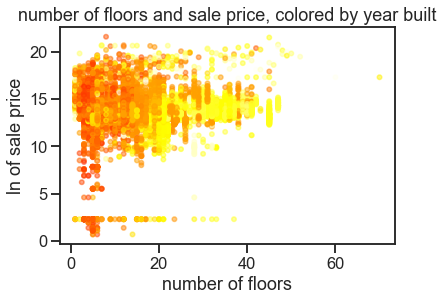

In [83]:
plt.scatter(ex_df.numfloors, np.log(ex_df.saleprice), alpha=0.5, c=np.log(ex_df['YEAR BUILT']), cmap='hot', marker='.')
plt.xlabel("number of floors")
plt.ylabel("ln of sale price")
plt.title("number of floors and sale price, colored by year built")

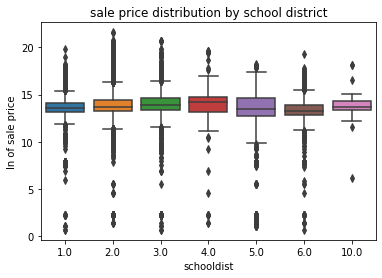

In [65]:
sns.boxplot(x='schooldist', y=np.log(ex_df.saleprice), data=ex_df)
plt.ylabel("ln of sale price")
plt.title("sale price distribution by school district")
plt.show()

Text(0.5, 1.0, 'school vs council districts, colored by police precinct')

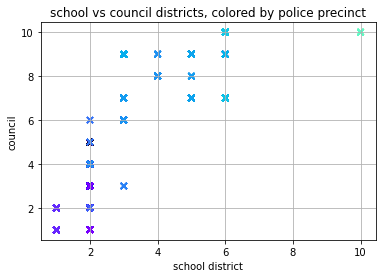

In [66]:
plt.scatter(ex_df.schooldist, ex_df.council, c=ex_df.policeprct, cmap='rainbow', alpha=0.5, marker='x')
plt.grid()
plt.xlabel("school district")
plt.ylabel("council")
plt.title("school vs council districts, colored by police precinct")

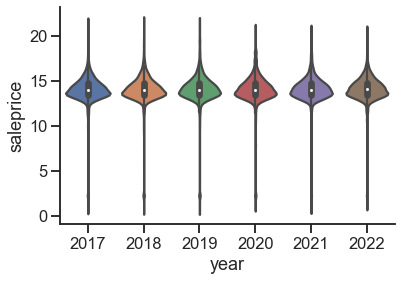

In [77]:
sns.violinplot(x='year', y=np.log(ex_df.saleprice), data=ex_df)
sns.despine()

##### Unsupervised learning to assign values to clusters? Get feature importance?

##### Split data into X and y, train test split

In [89]:
y = ex_df['saleprice']
X = ex_df.select_dtypes([np.number]).drop('saleprice', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.head()

,YEAR BUILT,year,schooldist,council,policeprct,numfloors
33850,1977.0,2019,2.0,4.0,17.0,34.0
34532,1935.0,2019,2.0,4.0,18.0,12.0
80985,1900.0,2022,2.0,1.0,1.0,5.0
37846,1925.0,2019,2.0,4.0,19.0,9.0
32201,1937.0,2019,6.0,10.0,34.0,6.0


##### Create and fit preprocessing pipeline

In [87]:
#some random ideation

X = X.fillna(0)

X_scaled = StandardScaler(X)

In [ ]:
#update this from ML code.

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

num_features = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_features = Pipeline(steps=[
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_features, X_train.columns)])

preprocess = preprocessor.fit(X_train) 

def preprocessor(data):
    data.drop(columns=['notes', 'xcoord', 'ycoord'], axis=1)
    preprocessed_data = preprocess.transform(data)
    #preprocessed_data = preprocessed_data.fillna(0)
    return preprocessed_data

#### Predicting sale price with nonspatial models <a class="anchor" id="bullet3"></a>

##### Instantiate models, tune hyperparameters, compare model performance

In [78]:
from sklearn.model_selection import GridSearchCV

###### Linear Regression

OLS assumptions are violated because of spatial autocorrelation.

In [88]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.0015784770219560151

###### Lasso

###### Random Forest (we expect this to perform the best)

#### Predicting sale price with spatial models <a class="anchor" id="bullet4"></a>

##### Add spatial features, re-run models and compare performance

#### Predicting probability of sale with nonspatial models <a class="anchor" id="bullet4"></a>

#### Predicting probability of sale with spatial models <a class="anchor" id="bullet5"></a>

#### Compare model performance <a class="anchor" id="bullet5"></a>